# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regularization and Cross-Validation Lab
Week 3 | Lesson 2.4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Use Cross-Validation to validate a Regression Model


![](assets/the_sweet_spot.png)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Prepare the Breast-Cancer Dataset for Processing

In [5]:
datafile_location = '../../../data/breast-cancer-wisconsin.data.csv'
breastcancer_df = pd.read_csv(datafile_location, header=None)
breastcancer_df.columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [7]:
breastcancer_df.head(1)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2


In [8]:
breastcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Note that `Bare Nuclei` appears to be strings.

In [11]:
def cast_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [9]:
breastcancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [12]:
breastcancer_df['Bare Nuclei'] = breastcancer_df['Bare Nuclei'].apply(cast_to_float)

In [20]:
breastcancer_df.dropna(inplace=True)

In [13]:
breastcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


## Create a Scorer with your preferred Metric

In [14]:
from sklearn.metrics import make_scorer, r2_score
RSQUARED = make_scorer(r2_score)

## Convert the Breast Cancer Dataset into a Feature Matrix and Target Vector

In [22]:
y = breastcancer_df['Class']
X = breastcancer_df.drop('Class', axis=1)

## Prepare Cross-Validation Scores for a Lasso

In [23]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_scores = cross_val_score(Lasso(), X, y, scoring=RSQUARED, cv=5)
cross_val_scores

array([ 0.50237577,  0.69820523,  0.70561167,  0.66592015,  0.65919171])

## Prepare a list of alphas and Prepare a Plot of Cross-Validation Scores for this list using a Ridge Regression

Mean MSE for alpha= 1e-05 is 0.82
Mean MSE for alpha=0.0001 is 0.82
Mean MSE for alpha= 0.001 is 0.82
Mean MSE for alpha=  0.01 is 0.82
Mean MSE for alpha=   0.1 is 0.82
Mean MSE for alpha=     1 is 0.80
Mean MSE for alpha=    10 is 0.45
Mean MSE for alpha=   100 is 0.00
Mean MSE for alpha=  1000 is -0.08


(-0.1, 1)

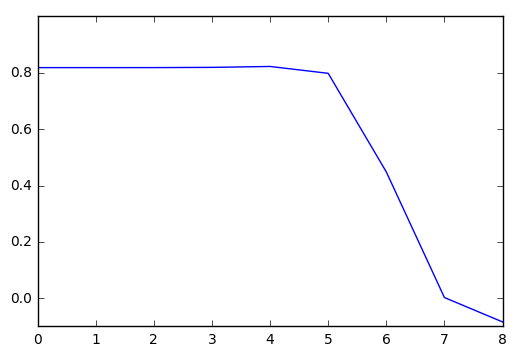

In [30]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    RIDGE_REGRESSOR = Ridge(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(RIDGE_REGRESSOR, X, y, scoring=RSQUARED)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(
                Ridge(alpha=alp, max_iter=1E5, normalize=True), X, y, scoring=RSQUARED)) 
                for alp in alphas]
plt.plot(mn_mn_sq_ers)
plt.ylim(-.1, 1)

## Prepare a list of alphas and Prepare a Plot of Cross-Validation Scores for this list using a Lasso

Mean MSE for alpha= 1e-05 is 0.82
Mean MSE for alpha=0.0001 is 0.82
Mean MSE for alpha= 0.001 is 0.82
Mean MSE for alpha=  0.01 is 0.73
Mean MSE for alpha=   0.1 is -0.09
Mean MSE for alpha=     1 is -0.09
Mean MSE for alpha=    10 is -0.09
Mean MSE for alpha=   100 is -0.09
Mean MSE for alpha=  1000 is -0.09


(-0.1, 1)

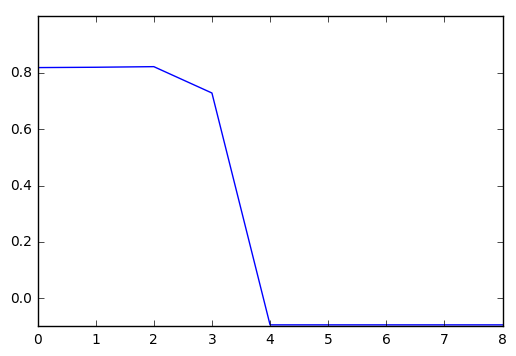

In [32]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    LASSO_REGRESSOR = Lasso(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(LASSO_REGRESSOR, X, y, scoring=RSQUARED)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(
                Lasso(alpha=alp, max_iter=1E5, normalize=True), X, y, scoring=RSQUARED)) 
                for alp in alphas]
plt.plot(mn_mn_sq_ers)
plt.ylim(-.1, 1)

# Analysis

Linear regression is not ideally suited to classification datasets.

## Perform a Grid Search Cross-Validation over a set of alphas and l1_ratios for an Elastic Net


In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [35]:
elastic_net = ElasticNet()
parameters = { 'alpha' : [1E-4, 1E-3, 1E-2, 0.1, 1, 10, 100, 1000], 
              'l1_ratio' : np.linspace(0,1,11)}
REGRESSOR = GridSearchCV(elastic_net, 
                         parameters, 
                         scoring=RSQUARED)
REGRESSOR.fit(X, y)

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:465: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)

## Prepare a `pcolormesh` of the results of your `GridSearchCV`

In [38]:
grid_search_results = pd.DataFrame(REGRESSOR.cv_results_)

In [42]:
def get_mean_test_score(x,y):
    index = grid_search_results[(grid_search_results['param_alpha']==x) & (grid_search_results['param_l1_ratio'] == y)].index[0]
    return grid_search_results.get_value(index, 'mean_test_score')

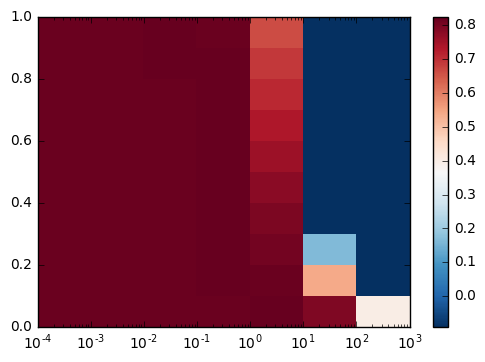

In [43]:
xs = grid_search_results['param_alpha'].unique()
ys = grid_search_results['param_l1_ratio'].unique()

intensity = [[get_mean_test_score(x, y) for x in xs] for y in ys]

plt.xscale('log')
plt.pcolormesh(xs, ys, intensity, cmap='RdBu_r')
plt.colorbar() #need a colorbar to show the intensity scale